# Background

In this scenario we are a company that has developed a new product that helps to curb emissions of four pollutants; SO2, CO, NO2 and O3. In this project we will explore a hypothetical scenario in which we will be working with various companies to run an A/B test to test the product at scale. The hope is that with our new product companies will be able to significantly curb their emissions, or ramp up their production while staying at their current emission level. 

We have found that our product works extremely well in a lab environment, but we expect that bringing it to a full scale operational setting will reduce its effectiveness. We believe that even with this reduction our new product will provide enough of a benefit to be a financially viable investment for manufacturers who are looking to increase their production capcity while staying within legal emission limits. We will examine this dataset to idenitify a state in which to run a pilot A/B test to confirm the effectiveness of our product and prove its market potential.  

In this scenario we will work with an EPA dataset to identify a state that has a significant emissions problem for the pollutants that our product can address. We will explore the data in order to effectively plan an A/B test that can be employed in this environment, discuss a rollout plan for our product and then prepare an evaluation plan that will define how to quantify success in our experiment.

# Data exploration and analysis

In [1]:
#Importing dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Bringing in our dataset. 
file = 'pollution_us_2000_2016.csv'
df = pd.read_csv(file)

In [3]:
#Basic dataset exploration.

#df.info()
df.head()
#df.columns

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [4]:
#Checking for missing states.

states_unique = df['State'].unique()
len(states_unique)

47

In [5]:
#Data exploration showed unexplained negative values present in our data. 
#We will assume these to be a reporting error and instead use the absolute values. 
df[['SO2 Mean', 'O3 Mean', 'CO Mean', 'NO2 Mean']] = abs(df[['SO2 Mean', 'O3 Mean', 'CO Mean', 'NO2 Mean']])

In [6]:
#Splitting date string to isolate year. 
split = df['Date Local'].str.split('-')
year = split.str[0][:]
df['Year'] = year

#Gathering data for our initial exploration. 
heatmap_data = pd.DataFrame()
heatmap_data[['State', 'SO2 Mean', 'O3 Mean', 'CO Mean', 'NO2 Mean']] = df[['State', 'SO2 Mean', 'O3 Mean', 'CO Mean', 'NO2 Mean']] 
heatmap_data['Year'] = year

In [7]:
#Calculating an aggragate sum for the year based on state's average emission.
heatmap_data = heatmap_data.groupby(['State', 'Year']).sum()
heatmap_data.head()

SO2 Mean    O3 Mean     CO Mean      NO2 Mean
State   Year                                                  
Alabama 2013    95.507170   1.500256   26.164854   1496.138736
        2014  1432.117434  29.740140  248.341293  11350.565446
        2015  1212.153788  28.799960  265.232016  10894.296248
        2016   497.730060  16.895256  124.870426   5676.824424
Alaska  2014  4261.296388   7.379508  326.097810   8347.492880

In order to find a state that has been signficantly affected by the new regulations we decide that it is important to have at least 15-years of data avaiable in order to build a historically accurate time-line of how the state has addressed their pollution problem. 

In [8]:
#Reshaping data for heatmap and dropping states with less than 15 years of reported data. 
df_pivot_SO2 = heatmap_data.pivot_table(index='State', columns='Year', values='SO2 Mean').dropna(thresh=15)
df_pivot_O3= heatmap_data.pivot_table(index='State', columns='Year', values='O3 Mean').dropna(thresh=15)
df_pivot_CO= heatmap_data.pivot_table(index='State', columns='Year', values='CO Mean').dropna(thresh=15)
df_pivot_NO2 = heatmap_data.pivot_table(index='State', columns='Year', values='NO2 Mean').dropna(thresh=15)

df_pivot_SO2

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
State,,,,,,,,,,,,,,,,,
Arizona,8098.141693,6049.762893,6764.838916,5719.684618,5799.567076,10651.871017,10189.260539,7781.449763,7307.306505,6047.389514,5547.181495,2766.948136,3434.712564,2814.456936,3659.789850,2375.654470,269.230490
California,59873.722395,67506.648989,63300.750724,55103.942701,61790.138999,57337.129253,47277.168894,45106.195433,44952.571612,35948.068174,23971.721143,26823.344648,21094.702210,17930.282160,17162.698489,15539.509757,3359.285002
Colorado,3121.564494,3130.004256,2440.004265,2383.460970,2604.808786,3957.398668,5353.133398,5351.087766,2717.793406,1754.440424,871.820684,1800.713406,3699.348381,4453.112294,4077.909231,4314.956345,1080.756108
District Of Columbia,11848.258010,9285.282774,9800.554688,12018.681600,9427.664834,6492.763936,6606.504208,6778.371830,8001.285412,6558.078862,4893.419832,6242.284455,3817.994294,2638.300830,1909.217834,1676.404327,225.493776
Florida,2810.850892,1618.564284,961.145632,949.979884,923.176156,750.338136,570.509040,1922.474216,1411.428986,169.032034,212.228216,140.809304,87.268948,100.681676,174.619586,49.233818,144.292584
Illinois,17076.982658,17239.686452,12627.495017,11563.762452,9751.516328,10933.304946,5999.558978,8897.195185,7783.749374,8626.405370,5949.145239,7821.411643,2939.095532,1660.986687,2115.916158,2808.845434,675.087614
Indiana,4910.334962,2359.410668,1798.129546,2414.517514,2703.271618,3508.218416,6913.738474,2399.823677,1814.391932,1092.557366,1755.759350,1001.793136,517.021362,4207.854190,3918.139508,1679.770355,152.473684
Kansas,2783.189956,2963.500530,5010.525248,4374.609892,5422.562458,5740.029406,6727.532942,6126.747460,5612.819520,6364.044108,7098.974586,5068.445738,3825.283274,2517.459504,2475.725634,2063.372088,379.739684
Louisiana,5356.354998,5316.187304,3600.382002,4841.753120,5051.419620,7081.886338,5376.652326,3655.877350,3425.625552,2763.041190,1919.790408,1811.253600,1170.649568,914.765370,1648.414866,1552.266850,507.644946


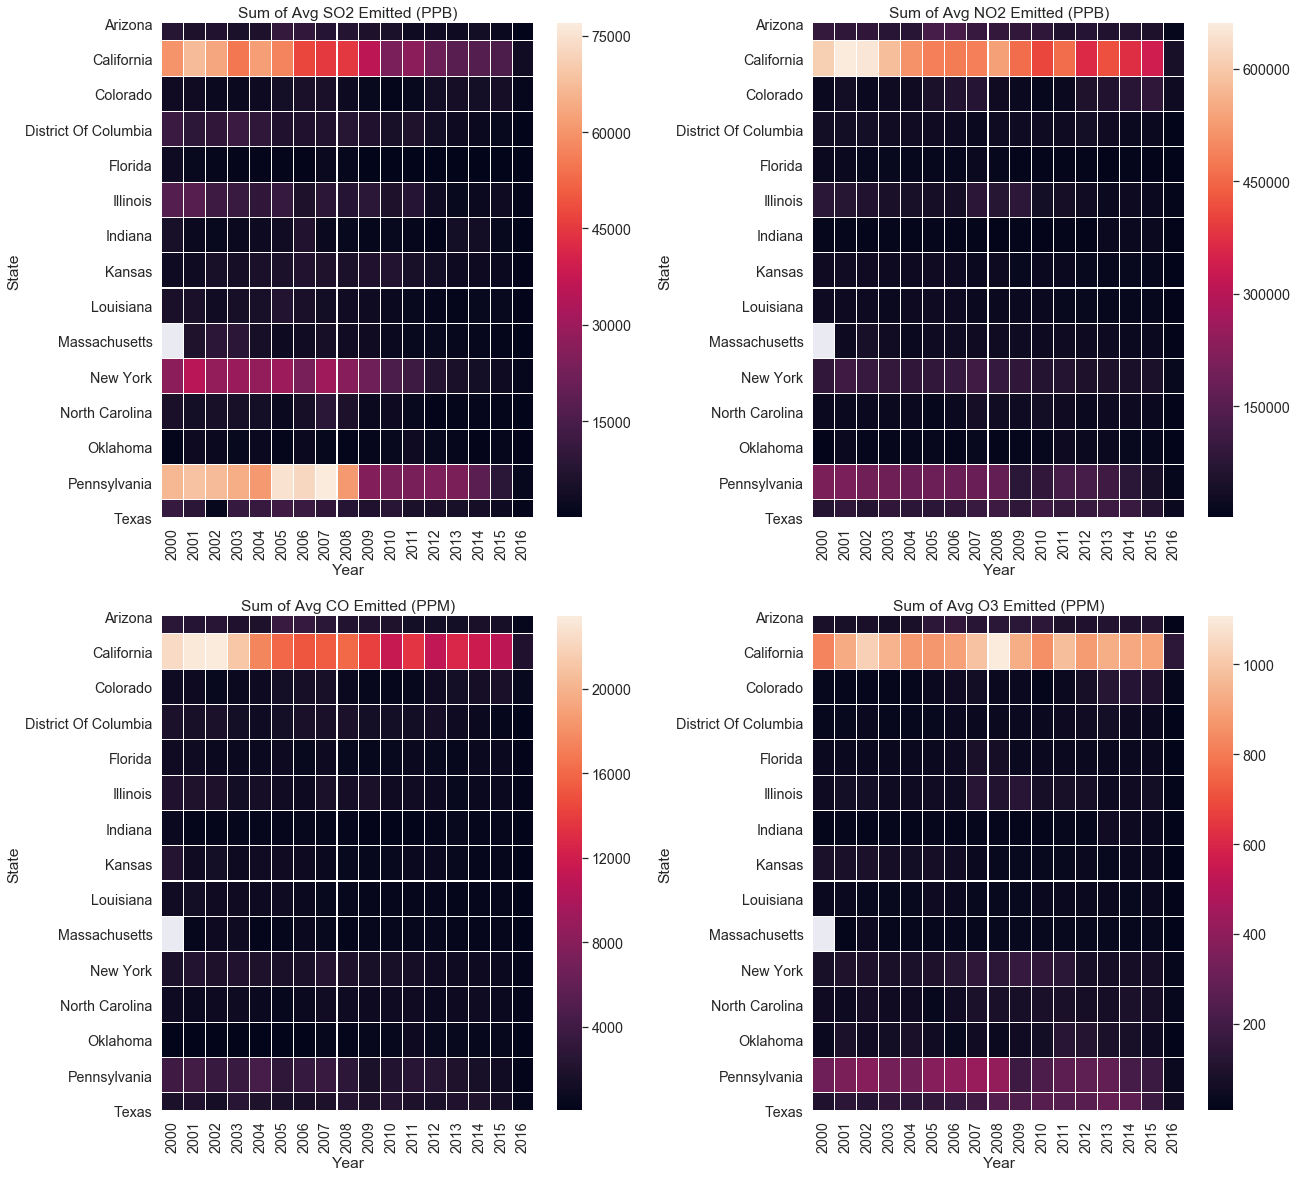

In [9]:
#Plotting Heatmaps showing Cumulative total of avg pollution by state and year for each substance

sns.set(font_scale=1.3)
f, axes = plt.subplots(2, 2, figsize=(20,20))
sns.heatmap(df_pivot_SO2, linewidths =.1, ax=axes[0,0]).set_title('Sum of Avg SO2 Emitted (PPB)')
sns.heatmap(df_pivot_O3, linewidths =.1, ax=axes[1,1]).set_title('Sum of Avg O3 Emitted (PPM)')
sns.heatmap(df_pivot_CO, linewidths =.1, ax=axes[1,0]).set_title('Sum of Avg CO Emitted (PPM)')
sns.heatmap(df_pivot_NO2, linewidths =.1, ax=axes[0,1]).set_title('Sum of Avg NO2 Emitted (PPB)')
f.subplots_adjust(wspace=.4, hspace=.2)
plt.show()

Based on the above heatmaps it becomes clear that the state which has the most potenital for benefitting from this product is California. We can see that California has significantly high emissions across all pollutants that our product can adress. This is likely due to the fact that it is a very large state with a lot of industrial activity. For this reason we will select it as our test state and dive deeper into the data reported by counties within its borders.   

In [10]:
#Exploring how many Californian counties are available for analyis in our dataset. 
ca_counties = df['County'].loc[df['State'] == 'California'].unique().tolist()
len(ca_counties)

18

In [11]:
#Preparing a dataframe for further exploring the available data with respect to Californian counties. 
#We employ a threshold of 5 years as the same reporting history requirement for each county.
ca_county_data = pd.DataFrame()

ca_county_data[['County', 'Year', 'SO2 Mean', 'O3 Mean', 'CO Mean', 'NO2 Mean']] = df[['County', 'Year', 'SO2 Mean', 'O3 Mean', 'CO Mean', 'NO2 Mean']].loc[df['State'] == 'California']
ca_county_data = ca_county_data.groupby(['County', 'Year']).sum()

ca_county_pivot_SO2 = ca_county_data.pivot_table(index='County', columns='Year', values='SO2 Mean').dropna(thresh=5)
ca_county_pivot_NO2 = ca_county_data.pivot_table(index='County', columns='Year', values='NO2 Mean').dropna(thresh=5)
ca_county_pivot_O3 = ca_county_data.pivot_table(index='County', columns='Year', values='O3 Mean').dropna(thresh=5)
ca_county_pivot_CO = ca_county_data.pivot_table(index='County', columns='Year', values='CO Mean').dropna(thresh=5)

ca_county_data

SO2 Mean    O3 Mean     CO Mean      NO2 Mean
County  Year                                                  
Alameda 2001   141.091670   0.799228   61.819702   2094.177208
        2002  2219.574616  25.865968  964.162852  26207.761158
        2003  1229.463328   9.286812  349.308712   8771.827128
        2007   120.266504   1.140704   42.060686   1961.187188
        2008  1272.049472  26.247608  391.355818  20685.935400
...                   ...        ...         ...           ...
Ventura 2000  2546.930602  30.409962  395.280523  20005.040494
        2001  5030.821312  31.448220  301.878719  15910.924942
        2002   648.640556  33.371620  354.466130  13591.463468
        2003   329.602590  28.683612  567.230574  14564.069336
        2004    38.139828   6.606834  103.904612   3904.266214

[235 rows x 4 columns]

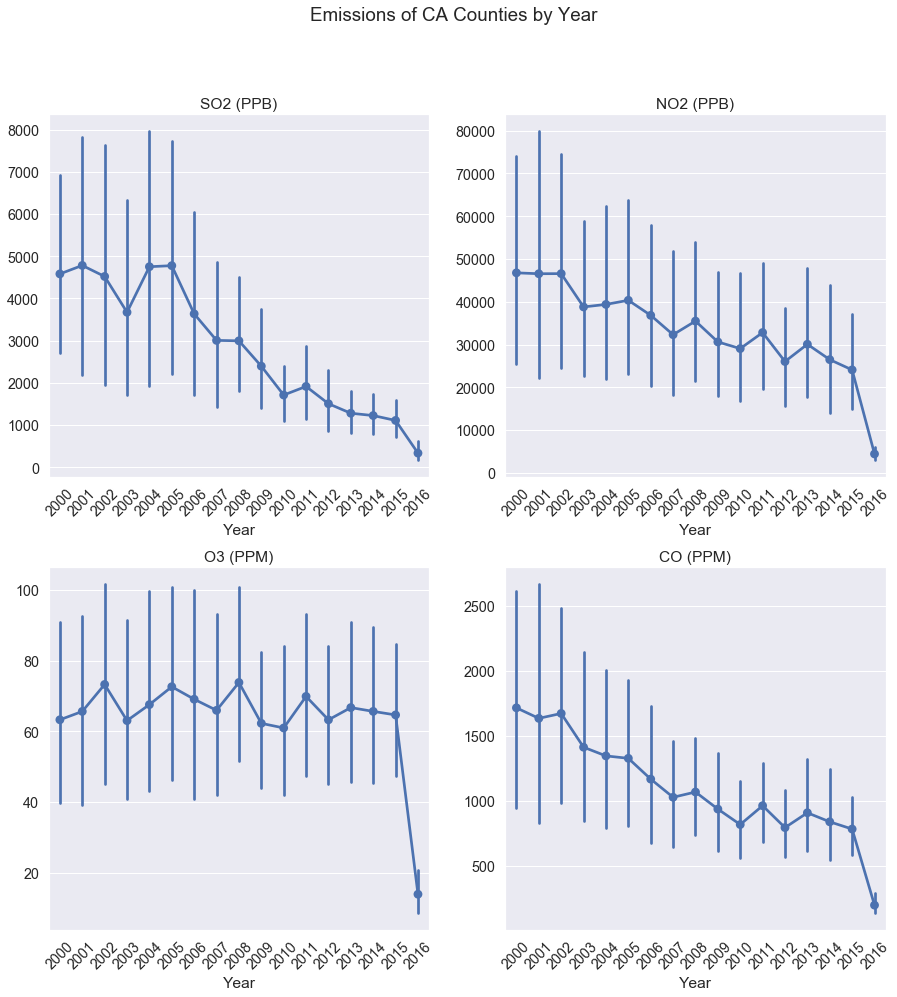

In [12]:
#Plotting a pointplot to examine the emissions of CA counties by year to develop a historical understanding of our data. 
f, axes = plt.subplots(2, 2, figsize=(15,15))
sns.set_style('darkgrid')
f.suptitle('Emissions of CA Counties by Year')
f.subplots_adjust(wspace=.2, hspace=.25) 

SO2_pp = sns.pointplot(data=ca_county_pivot_SO2, columns='County', ax=axes[0,0])
NO2_pp = sns.pointplot(data=ca_county_pivot_NO2, columns='County', ax=axes[0,1])
O3_pp = sns.pointplot(data=ca_county_pivot_O3, columns='County', ax=axes[1,0])
CO_pp = sns.pointplot(data=ca_county_pivot_CO, columns='County', ax=axes[1,1])

SO2_pp.set_xticklabels(SO2_pp.get_xticklabels(), rotation=45)
NO2_pp.set_xticklabels(NO2_pp.get_xticklabels(), rotation=45)
O3_pp.set_xticklabels(O3_pp.get_xticklabels(), rotation=45)
CO_pp.set_xticklabels(CO_pp.get_xticklabels(), rotation=45)

SO2_pp.set_title('SO2 (PPB)')
NO2_pp.set_title('NO2 (PPB)')
O3_pp.set_title('O3 (PPM)')
CO_pp.set_title('CO (PPM)')

plt.show()


From visualizations above we can see that there is a clear downward trend for three of four pollutants in Californian counties, the only exception being O3 which has stayed relatively constant over the period that we have examined. This information is consistent with the general heatmap from before. We saw that California as a whole showed a generally negative trend for emissions. 

In the heatmap we saw that 2016 had a steep decrease, a trend that is clearly repeated in the point plots above. This is likely due to missing or incomplete data for the year 2016. We will explore this further below. 


To better understand our data we will take a look at the most recent year of emissions reports. It is important to understand how our data are distributed within our counties before we approach companies with our product. 

In [13]:
#ca_county_data.index
ca_county_data.xs('2016', level='Year')

,SO2 Mean,O3 Mean,CO Mean,NO2 Mean
County,,,,
Alameda,436.984220,9.642192,249.043186,6712.792380
Contra Costa,1356.988406,34.903312,545.665736,10070.346684
Fresno,16.065146,3.335308,110.670146,3558.590112
Humboldt,269.258200,19.781620,193.049896,1466.595332
Imperial,290.845852,9.651580,186.553242,5563.109692
Sacramento,280.019850,1.783500,48.328838,1021.678792
San Bernardino,87.586322,9.432668,143.547496,4229.197556
Santa Barbara,206.132934,28.818666,124.920472,1593.374156
Santa Clara,119.422326,10.243136,176.095080,6283.479904


In [14]:
#Preparing our data to make a violinplot to examine distribution of emissions. 
so2_data = ca_county_data['SO2 Mean'].xs('2016', level='Year')
o3_data = ca_county_data['O3 Mean'].xs('2016', level='Year')
co_data = ca_county_data['CO Mean'].xs('2016', level='Year')
no2_data = ca_county_data['NO2 Mean'].xs('2016', level='Year')

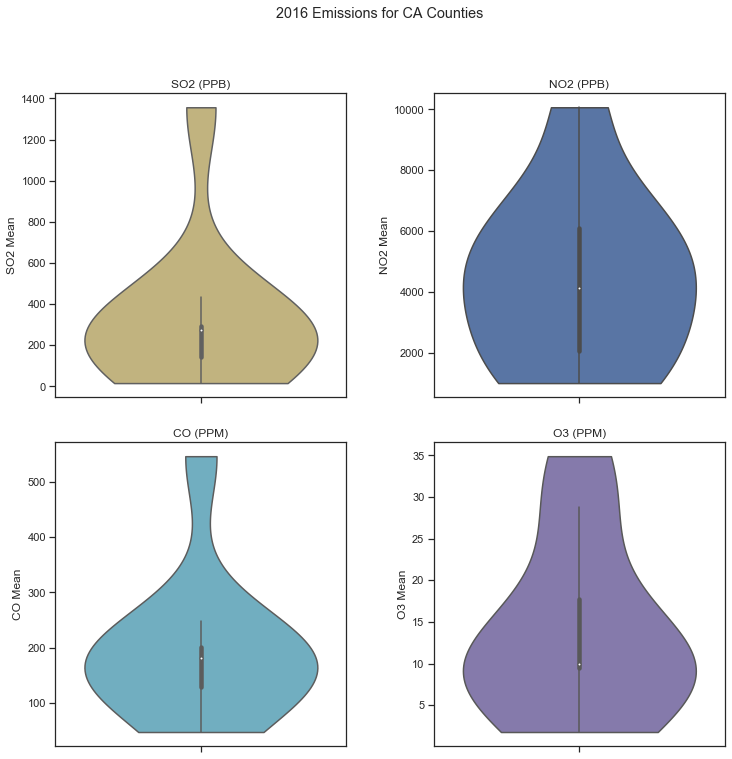

In [23]:
#Plotting a violinplot to examine distribution of emissions. 
sns.set_style("ticks")
f, axes = plt.subplots(2, 2, figsize=(12,12))
f.suptitle('2016 Emissions for CA Counties')
f.subplots_adjust(wspace=.3, hspace=.15) 

sns.violinplot(y=so2_data, color='y', ax=axes[0,0], cut=0).set_title('SO2 (PPB)') 
sns.violinplot(y=no2_data, color='b', ax=axes[0,1], cut=0).set_title('NO2 (PPB)')
sns.violinplot(y=co_data, color='c', ax=axes[1,0], cut=0).set_title('CO (PPM)')
sns.violinplot(y=o3_data, color='m', ax=axes[1,1], cut=0).set_title('O3 (PPM)')

plt.show()

We can see that each pollutant has a rather unique distribution but the distributions for SO2 and CO have some commonalities, while the same is true for NO2 and O3. We can also see that each distribution is bottom heavy, Most counties have relatively low emissions while there are select counties that have higher outputs.  

Before we start randomly selecting the counties we want to approach with our new product it is also imporant to understand whether our data have seasonal trends or patterns. This is valuable knowledge because it will help to inform us with respect to how long we need to run our test for and how we might expect our gathered data to change depending on the reporting period. 

As a quick exploratory look we will examine the data available for the county of Contra Costa which has above average emissions for each of our pollutants. To get some historical context we will first examine three years that were rather similar in our historical pointplots. From the pointplot visualizations above we can see that 2013, 2014 and 2015 all have similar mean values. These are also recent years so they will be comparable to 2016 which we will plot separately below because of the differing magnitude of reported emissions for this year. 


In [16]:
#Examining Contra Costa county for seasonal emissions trends 2013-2015
contra_costa = pd.DataFrame()

contra_costa_13 = df[(df['County'] == 'Contra Costa') & (df['Year'] == '2013')] 
contra_costa_14 = df[(df['County'] == 'Contra Costa') & (df['Year'] == '2014')] 
contra_costa_15 = df[(df['County'] == 'Contra Costa') & (df['Year'] == '2015')]
contra_costa_16 = df[(df['County'] == 'Contra Costa') & (df['Year'] == '2016')] 

contra_costa = pd.concat([contra_costa_13, contra_costa_14, contra_costa_15, contra_costa_16])


In [17]:
#splitting date and defining column to only include year
cc_split = contra_costa['Date Local'].str.split('-')
month = cc_split.str[1][:]
contra_costa['month'] = month

In [18]:
unique_months = contra_costa['month'].unique()
unique_years = contra_costa['Year'].unique()

contra_costa = contra_costa.set_index(['Year', 'month'])

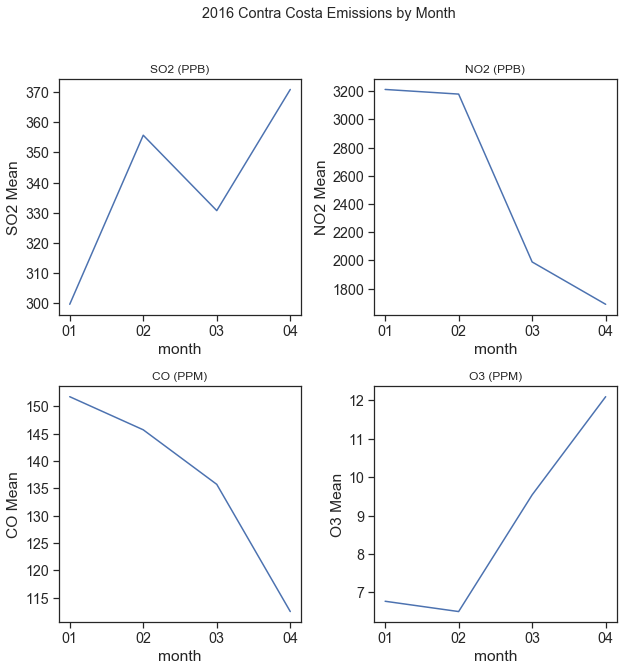

In [19]:
cc_data = contra_costa.sum(level=['Year','month'])
cc_data_line = [cc_data.xs('2013'), cc_data.xs('2014'), cc_data.xs('2015')]

f, axes = plt.subplots(2, 2, figsize=(10,10))
f.subplots_adjust(wspace=.3, hspace=.3)
sns.set(font_scale=1, style='whitegrid')
f.suptitle('2016 Contra Costa Emissions by Month')

sns.lineplot(data=cc_data.xs('2016'), x=cc_data.xs('2016').index, y='SO2 Mean', ax=axes[0,0]).set_title('SO2 (PPB)')
sns.lineplot(data=cc_data.xs('2016'), x=cc_data.xs('2016').index, y='NO2 Mean', ax=axes[0,1]).set_title('NO2 (PPB)')
sns.lineplot(data=cc_data.xs('2016'), x=cc_data.xs('2016').index, y='CO Mean', ax=axes[1,0]).set_title('CO (PPM)')
sns.lineplot(data=cc_data.xs('2016'), x=cc_data.xs('2016').index, y='O3 Mean', ax=axes[1,1]).set_title('O3 (PPM)')
plt.show()

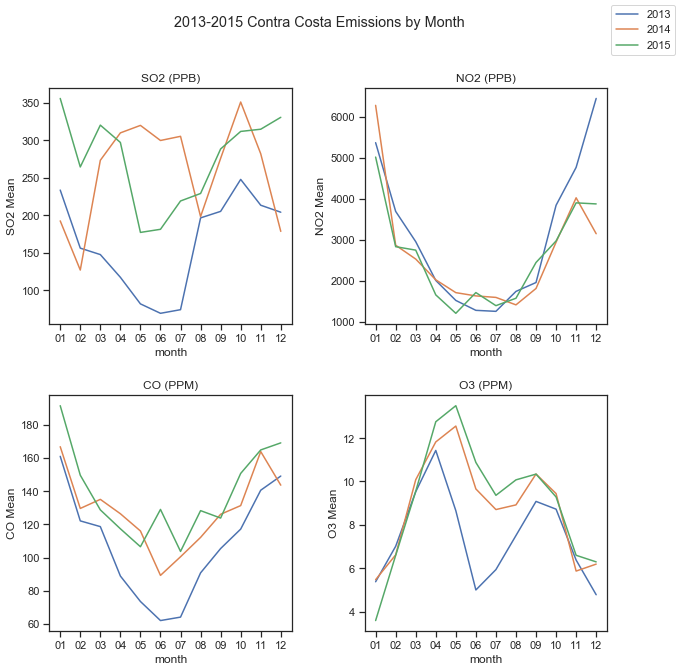

In [24]:
#Creating a line plot for each year and pollutant to show yearly trend overlap
f, axes = plt.subplots(2, 2, figsize=(10,10))
f.subplots_adjust(wspace=.3, hspace=.3)
sns.set(font_scale=1, style='whitegrid')
f.suptitle('2013-2015 Contra Costa Emissions by Month')

for entry in cc_data_line:
    sns.lineplot(data=entry, x=entry.index, y='SO2 Mean', ax=axes[0,0]).set_title('SO2 (PPB)')
    sns.lineplot(data=entry, x=entry.index, y='NO2 Mean', ax=axes[0,1]).set_title('NO2 (PPB)')
    sns.lineplot(data=entry, x=entry.index, y='CO Mean', ax=axes[1,0]).set_title('CO (PPM)')
    sns.lineplot(data=entry, x=entry.index, y='O3 Mean', ax=axes[1,1]).set_title('O3 (PPM)')
f.legend(['2013','2014','2015'], loc='upper right')
plt.show()

As we pointed out above, we do not have all the reported values for 2016, but we can see that even with a limited segment of data data we are following a similar trend for NO2, CO, and O3. It is more difficult to tell whether there is a true trend for SO2 and we may need to do a little more analysis before deciding if this data is following a seasonal pattern. This data was examined for one county and it is very likely that different counties have different seasonal trends based on the industry that is present in that location. Rather than examining every county in depth we will instead plan our A/B test to span a full year in order to account for any seasonal trends taht might be present. 



# Rollout 

To roll out our plan we will conduct a parallel A/A and A/B test. We will select 90 companies that are known to emit these pollutants. These companies will be split into three groups of 30 companies each. The random selections will be made from premade stratified groups. These groups will be made to help address factors that might influence the emissions of that county to help ensure that our groups are comparable. These factors can will include geographic location of the county, the population of the county, the magnitute of company emissions and the concentration of industry within that county. 

Two "A" groups will be composed of companies that do not use our product and continue operations as normal, while the third "B" group will employ our product. In order to keep the results of our test standard the companies have agreed to keep the processes that we are monitoring constant, there will be no process changes or improvements outside of regular maintance during the testing period. As an incentive for their cooperation the companies will recieve a free three year license of our technology after the completion of the test. 

Our hypothesis is that the group employing our product will have lower emissions than the groups that do not use our product. The null hypothesis alternative would be that both groups have the same level of performance. 

We will begin with a 10% rollout to ensure that there are no issues with the product for a period of three months and later increase to a full rollout for a period of 1 year to ensure that we are not basing our data off of a seasonal cycle that might be present within a county. 

# Evaluation

The goal of our product is to help a company ramp up production while remaining within legal emission limits. To test the capacity of the product, and protect our test companies from facing fines in the event of a failure, our test will measure the drop in emissions that a company realizes by employing our product while remaining at a constant level of production. 

The companies we work with have agreed to share their regular monthly emissions reports and production numbers with us. As a part of the evaluation process we will compare our two A groups to first evaluate the variation that may be present within control groups. 

We will test the differences in these groups by employing a t-test between the lower-emitting "A" group and the "B" group. If our null hypothesis is true we expect that there will be no significant difference between group "A" and group "B". If our hypothesis is true we expect that group "B" will perform significantly better than our "A" group. We use a p-value threshold of 0.05 and use a 2 tailed t-test for evaluation of this hypothesis. 